In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
from snsphd import viz
import math
import orjson
Colors, pallet = viz.phd_style(jupyterStyle = True, grid = True, axese_width=0.5, text = 6, svg_mode=True)

from enum import Enum
from dataclasses import dataclass, fields, field, _MISSING_TYPE 

from load_schema import Decode, Result

import matplotlib as mpl
import os

# set the DPI for all figures
mpl.rcParams['figure.dpi'] = 100

from snsphd.layout import bisect

In [3]:



with open("../inter/decode_20GHz26.0.json", "r") as f:
    data = orjson.loads(f.read())
    decode = Decode(**data)

db_values = np.arange(16,50, 2).tolist()
print(db_values)

# need type hints for intellisense to work
def decode_from_folder(folder_path: str, db_values: list[int]) -> list[Decode]:
    decodes = []
    for db in db_values:
        filename = f"decode_20GHz{db}.0.json"
        filepath = os.path.join(folder_path, filename)
        with open(filepath, "r") as f:
            data = orjson.loads(f.read())
            decode = Decode(**data)
            decodes.append(decode)
    return decodes

decodes = decode_from_folder("../inter", db_values)

[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48]


In [4]:
for item in decode.results:
    print(len(item))

8937
8937
8937
8937
8937


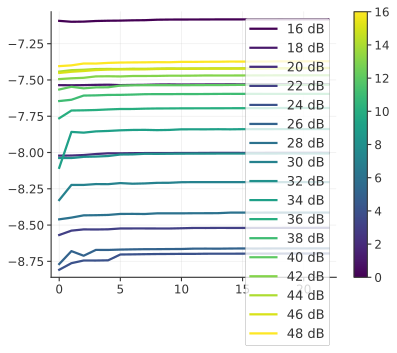

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

# Create a list of colors using the viridis colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(decodes)))

for d in range(len(decodes)):
    ax.plot([decodes[d].gm_data.gm_list[i].log_likelihood for i in range(len(decodes[d].gm_data.gm_list))],
            c=colors[d], label=f"{db_values[d]} dB")

# Add a colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=len(decodes)-1))
sm.set_array([])
fig.colorbar(sm, ax=ax)

ax.legend()


In [6]:
db_values

[16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48]

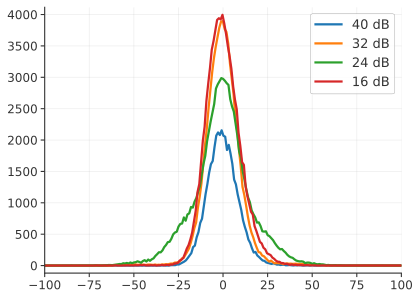

In [7]:
d=12
plt.plot(decodes[d].correction_data.corrected_bins[:-1], decodes[d].correction_data.corrected_hist1, label=f"{db_values[d]} dB")

d=8
plt.plot(decodes[d].correction_data.corrected_bins[:-1], decodes[d].correction_data.corrected_hist1, label=f"{db_values[d]} dB")

d=4
plt.plot(decodes[d].correction_data.corrected_bins[:-1], decodes[d].correction_data.corrected_hist1, label=f"{db_values[d]} dB")

d=0
plt.plot(decodes[d].correction_data.corrected_bins[:-1], decodes[d].correction_data.corrected_hist1, label=f"{db_values[d]} dB")
plt.xlim(-100, 100)
plt.legend()

(-250.0, 250.0)

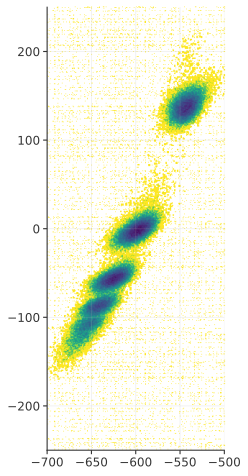

In [8]:
# plt.plot(decode.hist_data.bins[:-1], decode.hist_data.counts)
# from IPython.display import Image
# viz.matplotlib_ipython_png_mode()
import matplotlib
from matplotlib.colors import LogNorm

# matplotlib.use('png')
# _ = ax.hist2d(decode.hist_data.counts[:,0],decode.hist_data.counts[:,1], bins=(decode.hist_data.bins, decode.hist_data.bins), cmap="viridis")

d = decode.hist_data

hist, xedges, yedges = np.histogram2d(
    d.counts[:, 1], d.counts[:, 0], bins=(decode.hist_data.bins, decode.hist_data.bins)
)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(
    hist,
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    norm=LogNorm(),
    cmap="viridis_r",
    origin="lower", rasterized=True)

ax.set_xlim(-700, -500)
ax.set_ylim(-250, 250)


In [9]:
# len(decodes[3].results[0])

# decodes[3].results[0][1].result


# @dataclass
# class PoissonData:
#     zeros: int = 0
#     one_plus: int = 0


mfrs = []
for d in range(len(decodes)):

    missing = 0
    found = 0
    for res in decodes[d].results[0]:
        result: Result = res.result
        if result == Result.MISSING:
            missing += 1
        if (result == Result.CORRECT) or (result == Result.INCORRECT):
            found += 1
        
    total = missing + found

    ratio_of_vacuum = missing/total
    mfr = -np.log(ratio_of_vacuum)
    mfrs.append(mfr)


# print("total: ", total, "real_total: ", len(decodes[3].results[0]))
# print("mfr", mfr)
print("mrfs", mfrs)


mrfs [6.099758256743249, 6.205791569017619, 6.899162914563932, 5.126991736131764, 3.4767708081533946, 2.267489912171461, 1.3973242984919467, 0.9130506865839585, 0.5852607618904826, 0.35080907657086813, 0.22692798361140368, 0.15027917888170228, 0.09403525428186685, 0.057217653791389204, 0.03739179472343739, 0.021832211525017433, 0.015902889706740177]


[-1000  -999  -998 ...   997   998   999]
-601.3019975855245


Text(540, -590, '$\\bm{|3\\rangle}$')

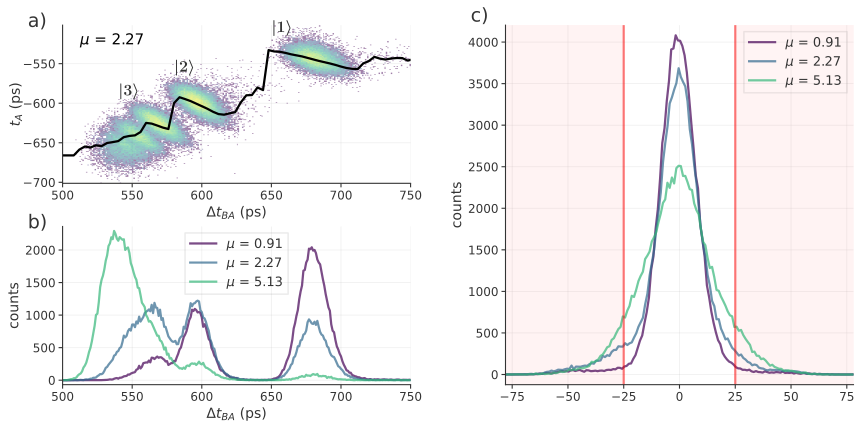

In [22]:
plt.rcParams['text.latex.preamble'] = r'\usepackage{bm}'

idx = 5

d = decodes[idx].hist_data
# d = decode.hist_data

left, right = bisect([0,0,1,1], direction='vert', offset=0.5, spacing=0.12)
left_bottom, left_top = bisect(left, direction='horiz', offset=0.5, spacing=0.12)

fig = plt.figure(figsize=(11, 5))


left_top_ax = fig.add_axes(left_top)
left_bottom_ax = fig.add_axes(left_bottom)


right_ax = fig.add_axes(right)

# left_top_ax.plot(d.slices[:-1], d.corr1-np.average(d.counts[:, 0]), color='black')
left_top_ax.plot(d.slices[:-1], d.corr1, color='black')
print(d.bins)
left_top_ax.hist2d(
            d.counts[:, 1] - d.counts[:, 0],
            d.counts[:, 0],
            bins=(d.bins, d.bins),
            norm=matplotlib.colors.LogNorm(), rasterized=True, alpha=0.5)
# left_top_ax.hist2d(
#             d.counts[:, 1] - d.counts[:, 0],
#             d.counts[:, 0]-np.average(d.counts[:, 0]),
#             bins=(d.bins, d.bins),
#             norm=matplotlib.colors.LogNorm(), rasterized=True, alpha=0.5)
left_top_ax.text(0.05, 0.95, f"$\mu$ = {mfrs[idx]:.2f}", transform=left_top_ax.transAxes, ha='left', va='top', color='black', fontsize=15)

print(np.average(d.counts[:, 0]))
left_top_ax.set_xlim(500, 750)
left_top_ax.set_ylim(np.average(d.counts[:, 0])-100, np.average(d.counts[:, 0])+100)

left_top_ax.set_xlabel(r"$\Delta t_{BA}$ (ps)")
left_top_ax.set_ylabel("$t_A$ (ps)", labelpad=0)




colors = plt.cm.viridis(np.linspace(0, 1, 4))

idx = 7
hist, bins = np.histogram(decodes[idx].hist_data.counts[:, 1] - decodes[idx].hist_data.counts[:, 0], bins=d.bins)
left_bottom_ax.plot(bins[:-1], np.roll(hist,2), color=colors[0], label=f"$\mu$ = {mfrs[idx]:.2f}", alpha=0.7)

idx = 5
hist, bins = np.histogram(decodes[idx].hist_data.counts[:, 1] - decodes[idx].hist_data.counts[:, 0], bins=d.bins)
left_bottom_ax.plot(bins[:-1], hist, color=colors[1], label=f"$\mu$ = {mfrs[idx]:.2f}", alpha=0.7)

idx = 3
hist, bins = np.histogram(decodes[idx].hist_data.counts[:, 1] - decodes[idx].hist_data.counts[:, 0], bins=d.bins)
left_bottom_ax.plot(bins[:-1], hist, color=colors[2], label=f"$\mu$ = {mfrs[idx]:.2f}", alpha=0.7)
leg = left_bottom_ax.legend(fancybox=False, framealpha=0.1)
leg.get_frame().set_linewidth(1.5)
# left_bottom_ax.set_yscale("log")
left_bottom_ax.set_xlabel(r"$\Delta t_{BA}$ (ps)")
left_bottom_ax.set_ylabel("counts")


left_bottom_ax.set_xlim(500, 750)
right_ax_start = -78
right_ax_end = 78
right_ax.set_xticks([-75, -50, -25, 0, 25, 50, 75])

right_ax.plot(decodes[7].correction_data.corrected_bins[:-1], decodes[7].correction_data.corrected_hist2, c=colors[0], label=f"$\mu$ = {mfrs[7]:.2f}", alpha=0.7)
right_ax.plot(decodes[5].correction_data.corrected_bins[:-1], decodes[5].correction_data.corrected_hist2, c=colors[1], label=f"$\mu$ = {mfrs[5]:.2f}", alpha=0.7)
right_ax.plot(decodes[3].correction_data.corrected_bins[:-1], decodes[3].correction_data.corrected_hist2, c=colors[2], label=f"$\mu$ = {mfrs[3]:.2f}", alpha=0.7)



leg = right_ax.legend(fancybox=False, framealpha=0.1)
leg.get_frame().set_linewidth(1.5)
right_ax.axvline(-25, color='red', alpha=0.5)
right_ax.axvline(25, color='red', alpha=0.5)
right_ax.axvspan(-25, right_ax_start, color='red', alpha=0.05)
right_ax.axvspan(25, right_ax_end, color='red', alpha=0.05)
right_ax.set_xlim(right_ax_start, right_ax_end)
right_ax.set_ylabel("counts")

left_top_ax.text(-.10, 1.08, "a)", transform=left_top_ax.transAxes, fontsize=19, va='top') # require plt.rcParams['text.latex.preamble'] = r'\usepackage{bm}'
left_bottom_ax.text(-.10, 1.08, "b)", transform=left_bottom_ax.transAxes, fontsize=19, va='top')
right_ax.text(-.10, 1.05, "c)", transform=right_ax.transAxes, fontsize=19, va='top')

left_top_ax.text(650, -510, r'$\bm{|1\rangle}$', fontsize=16, usetex=True)
left_top_ax.text(580, -560, r'$\bm{|2\rangle}$', fontsize=16, usetex=True)
left_top_ax.text(540, -590, r'$\bm{|3\rangle}$', fontsize=16, usetex=True)

viz.save_light_dark_all(fig, name="../figs/slope_cancellation", override_alpha=True)


In [125]:
1 - (10/400)

0.975

In [124]:
400/(10 + 400)

0.975609756097561

0.04275190410787864


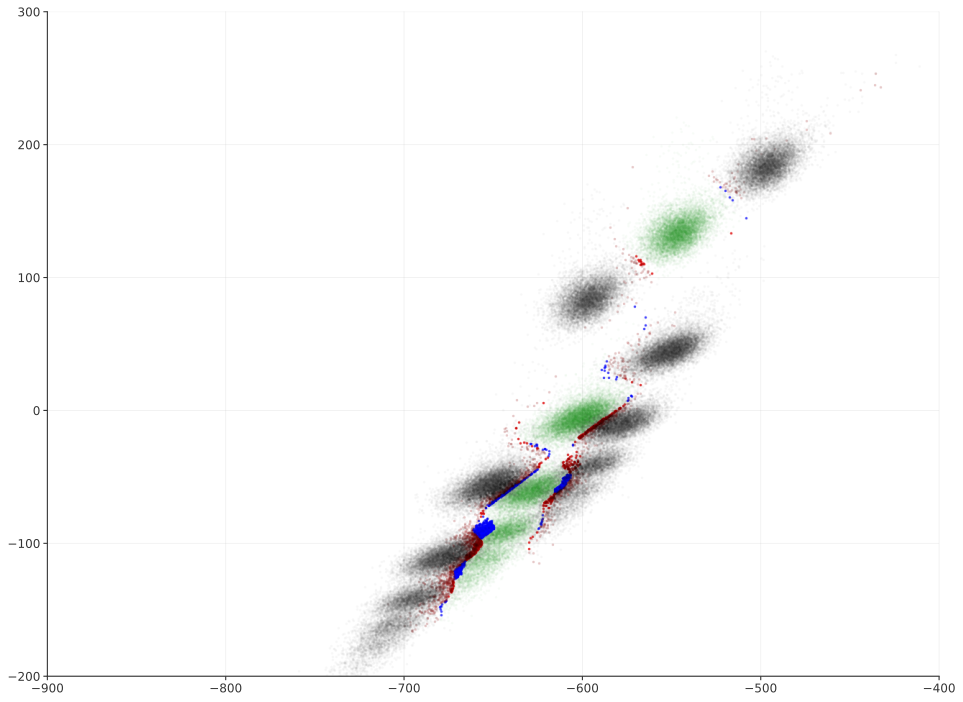

In [11]:
# decode.results[345]

# x = [Event.tag_x - 50*Event.true for Event in decode.results]
# x = [(Event.tag_x - 50*Event.true) if Event.tag_x > 0 else pass for Event in decode.results]
# y = [Event.tag_y - 50*Event.true for Event in decode.results]

class Arr:
    def __init__(self):
        self.x_correct = []
        self.y_correct = []
        self.x_incorrect = []
        self.y_incorrect = []
        self.x_gaussian_fixed = []
        self.y_gaussian_fixed = []
        self.x_gaussian_corrupted = []
        self.y_gaussian_corrupted = []

    def numpyify(self):
        for item in self.__dict__:
            self.__dict__[item] = np.array(self.__dict__[item])


a = Arr()

fig, ax = plt.subplots(1,1, figsize=(16,12))
for stream in decode.results:
    for Event in stream:
        if Event.result == Result.CORRECT:
            a.x_correct.append(Event.tag_x - 50*Event.true)
            a.y_correct.append(Event.tag_y - 50*Event.true)

        if Event.result == Result.INCORRECT:
            a.x_incorrect.append(Event.tag_x - 50*Event.true)
            a.y_incorrect.append(Event.tag_y - 50*Event.true)


        if (Event.gaussian_measured != Event.measured) and (Event.result == Result.CORRECT):
            a.x_gaussian_fixed.append(Event.tag_x - 50*Event.true)
            a.y_gaussian_fixed.append(Event.tag_y - 50*Event.true)

        

        if (Event.true == Event.measured) and (Event.result == Result.INCORRECT):
            a.x_gaussian_corrupted.append(Event.tag_x - 50*Event.true)
            a.y_gaussian_corrupted.append(Event.tag_y - 50*Event.true)

a.numpyify()


ax.scatter(a.x_correct, a.y_correct, s=5, marker='o', color="green", alpha=0.03, rasterized=True)
ax.scatter(a.x_gaussian_fixed, a.y_gaussian_fixed, s=5, marker='o', color='blue', alpha=0.7, rasterized=True)
ax.scatter(a.x_gaussian_corrupted, a.y_gaussian_corrupted, s=5, marker='o', color='red', alpha=0.7, rasterized=True)

ax.scatter(a.x_incorrect, a.y_incorrect, s=5, marker='o', color="darkred", alpha=0.2, rasterized=True)

print((len(a.x_gaussian_fixed) + len(a.x_gaussian_corrupted))/(len(a.x_correct) + len(a.x_incorrect)))



ax.scatter(np.concatenate((a.x_correct, a.x_incorrect)) + 50, np.concatenate((a.y_correct, a.y_incorrect)) + 50, s=5, marker='o', color="black", alpha=0.03, rasterized=True)
ax.scatter(np.concatenate((a.x_correct, a.x_incorrect)) - 50, np.concatenate((a.y_correct, a.y_incorrect)) - 50, s=5, marker='o', color="black", alpha=0.03, rasterized=True)

# ax.set_ylim(400,900)
# ax.set_xlim(-250,350)

ax.set_ylim(-200,300)
ax.set_xlim(-900,-400)

# # display the scatter plot using imshow
# fig.canvas.draw()
# image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
# image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
# plt.imshow(image)

# # # show the plot
# plt.show()
fig.savefig("testing.svg", dpi=300)



In [10]:
from overlap_measure import BiGauss


pi1 = 0.5
pi2 = 1.0 - pi1
mu1 = [0,0]
mu2 = [3,0]
Sigma1 = [[1,0],[0,1]]
Sigma2 = [[2.17,1.82], [1.82,2.17]]
Bi = BiGauss(mu1, mu2, Sigma1, Sigma2, pi1, pi2)
print('the OLR of this mixture Gaussian: {}'.format(Bi.OLR()))

the OLR of this mixture Gaussian: 0.7269174227246916
